In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sts
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from datetime import datetime

In [2]:
pd.options.mode.chained_assignment = None

# 1. Найти данные для классификации. Данные в группе повторяться не должны. Предобработать данные, если это необходимо.

### В качестве набора данных был выбран датасет дорожного трафика.

In [4]:
data = pd.read_csv('Traffic.csv', sep=',')

In [5]:
data

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


### Преобразование типов данных

In [7]:
data.Time.value_counts()

12:00:00 AM    31
12:15:00 AM    31
5:30:00 PM     31
5:15:00 PM     31
5:00:00 PM     31
               ..
7:15:00 AM     31
7:00:00 AM     31
6:45:00 AM     31
6:30:00 AM     31
11:45:00 PM    31
Name: Time, Length: 96, dtype: int64

In [8]:
for i in range(len(data.Time)):
    data.Time[i] = data.Time[i].replace(':00 ', ' ')

for i in range(len(data.Time)):
    time = datetime.strptime(data.Time[i], "%I:%M %p")
    data.Time[i] = time.strftime("%H.%M")


In [9]:
data.Time = data.Time.astype(float)

In [10]:
data

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0.00,10,Tuesday,31,0,4,4,39,low
1,0.15,10,Tuesday,49,0,3,3,55,low
2,0.30,10,Tuesday,46,0,3,6,55,low
3,0.45,10,Tuesday,51,0,2,5,58,low
4,1.00,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,22.45,9,Thursday,16,3,1,36,56,normal
2972,23.00,9,Thursday,11,0,1,30,42,normal
2973,23.15,9,Thursday,15,4,1,25,45,normal
2974,23.30,9,Thursday,16,5,0,27,48,normal


In [11]:
data['Day of the week'].value_counts()

Tuesday      480
Wednesday    480
Thursday     480
Friday       384
Saturday     384
Sunday       384
Monday       384
Name: Day of the week, dtype: int64

In [12]:
days = {'Sunday' : 1, 'Monday' : 2, 'Tuesday' : 3, 'Wednesday' : 4, 'Thursday' : 5, 'Friday' : 6, 'Saturday' : 7}

data['Day of the week'] = data['Day of the week'].map(days)

In [13]:
data.loc[data['Traffic Situation'] == 'low', ('Traffic Situation')] = 0
data.loc[data['Traffic Situation'] == 'normal', ('Traffic Situation')] = 1
data.loc[data['Traffic Situation'] == 'high', ('Traffic Situation')] = 2
data.loc[data['Traffic Situation'] == 'heavy', ('Traffic Situation')] = 3
data

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0.00,10,3,31,0,4,4,39,0
1,0.15,10,3,49,0,3,3,55,0
2,0.30,10,3,46,0,3,6,55,0
3,0.45,10,3,51,0,2,5,58,0
4,1.00,10,3,57,6,15,16,94,1
...,...,...,...,...,...,...,...,...,...
2971,22.45,9,5,16,3,1,36,56,1
2972,23.00,9,5,11,0,1,30,42,1
2973,23.15,9,5,15,4,1,25,45,1
2974,23.30,9,5,16,5,0,27,48,1


In [14]:
data['Traffic Situation'] = data['Traffic Situation'].astype(int)

### Подсчет дубликатов

In [15]:
data.duplicated().sum()

0

### Проверка на наличие пустых значений

In [16]:
data.isna().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

### Проверка качественных показателей на правильность значений

In [17]:
data['Traffic Situation'].value_counts()

1    1669
3     682
2     321
0     304
Name: Traffic Situation, dtype: int64

In [18]:
data['Day of the week'].value_counts()

3    480
4    480
5    480
6    384
7    384
1    384
2    384
Name: Day of the week, dtype: int64

### Проверка кличественных показателей на наличие выбросов

<Axes: >

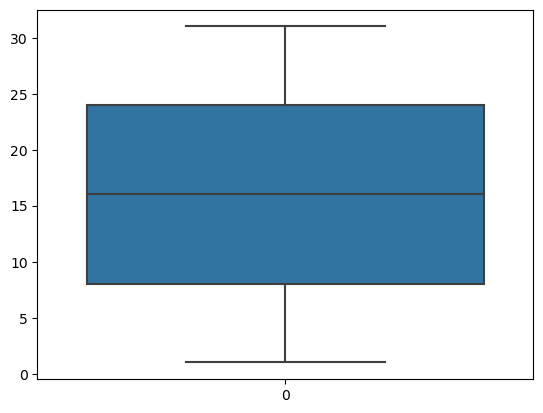

In [19]:
sns.boxplot(data=data.Date)

<Axes: >

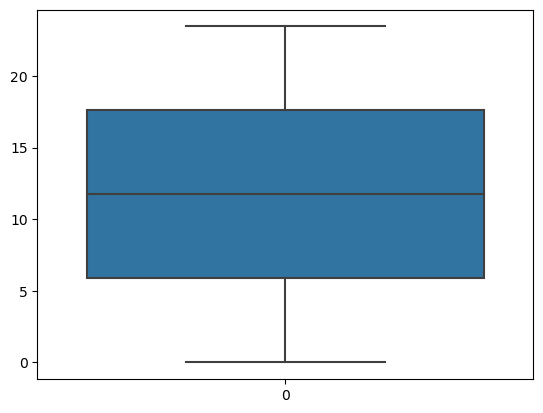

In [20]:
sns.boxplot(data=data.Time)

<Axes: >

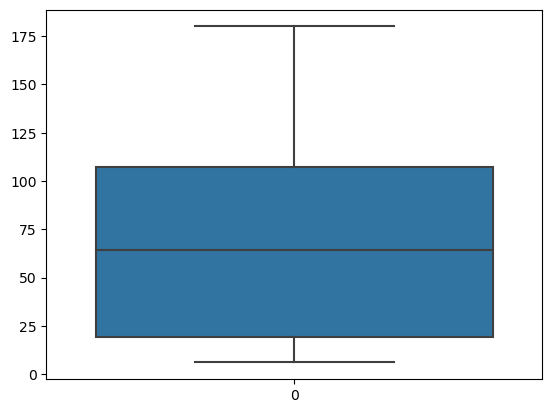

In [21]:
sns.boxplot(data=data.CarCount)

<Axes: >

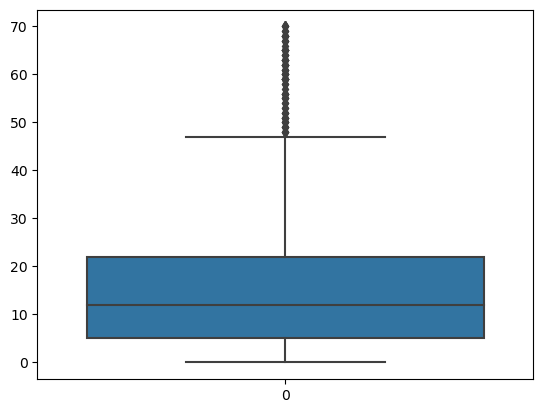

In [22]:
sns.boxplot(data=data.BikeCount)

<Axes: >

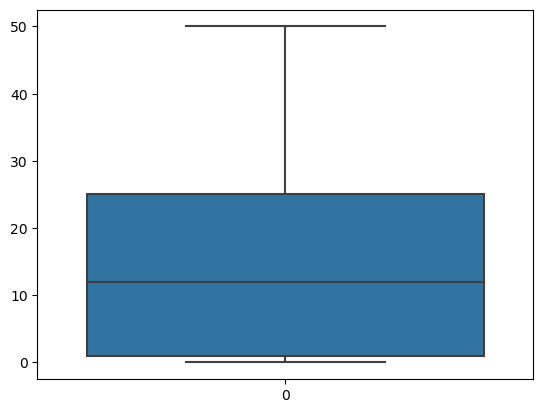

In [23]:
sns.boxplot(data=data.BusCount)

<Axes: >

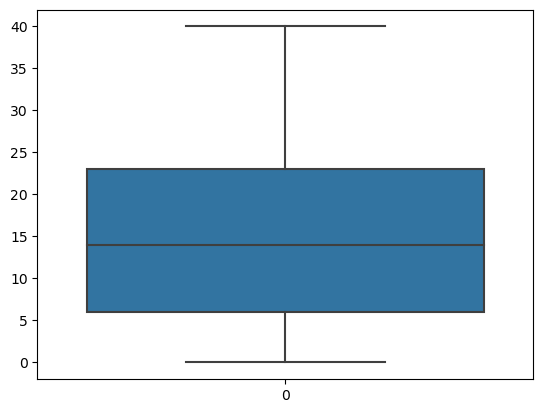

In [24]:
sns.boxplot(data=data.TruckCount)

<Axes: >

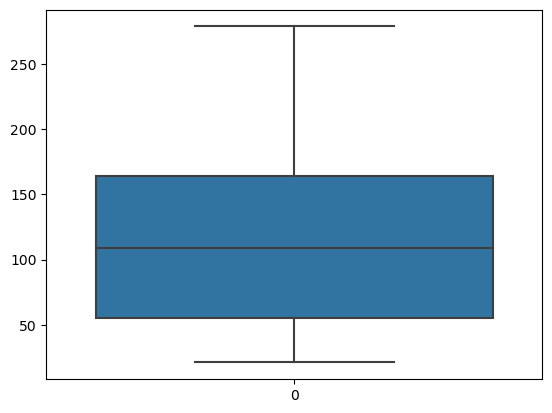

In [25]:
sns.boxplot(data=data.Total)

# 2. Изобразить гистограмму, которая показывает баланс классов. Сделать выводы.

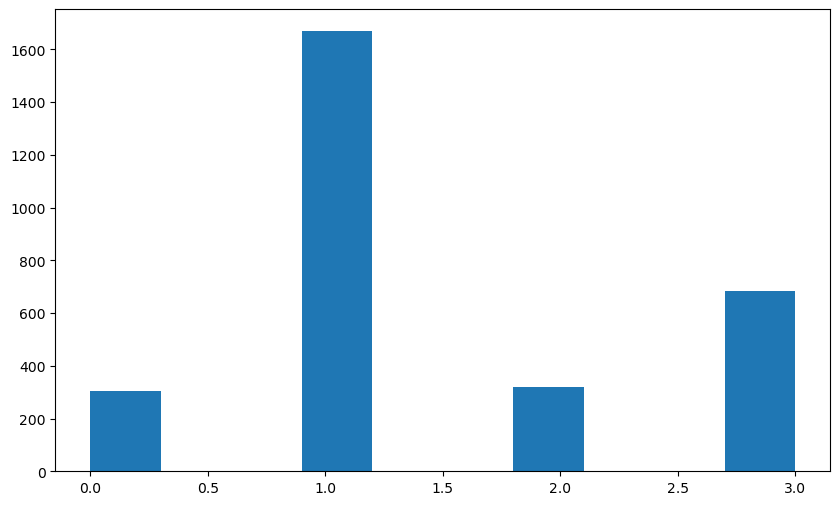

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(data['Traffic Situation'])
plt.show()

### Наиболее распространенный класс: 1, который соответствует нормальный загруженности.

# 3. Разбить выборку на тренировочную и тестовую. Тренировочная для обучения модели, тестовая для проверки ее качества.

In [27]:
predictors = data.loc[:, ~data.columns.isin(['Date', 'Traffic Situation'])]
target = data['Traffic Situation']
x_train, x_test, y_train, y_test = train_test_split(predictors, target, train_size = 0.8, shuffle = True, random_state = 250)

print('Размер для признаков обучающей выборки', x_train.shape, '\n',
      'Размер для признаков тестовой выборки', x_test.shape, '\n',
      'Размер для целевого показателя обучающей выборки',y_train.shape, '\n',
      'Размер для показателя тестовой выборки', y_test.shape)

Размер для признаков обучающей выборки (2380, 7) 
 Размер для признаков тестовой выборки (596, 7) 
 Размер для целевого показателя обучающей выборки (2380,) 
 Размер для показателя тестовой выборки (596,)


In [28]:
x_train

,Time,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total
2244,9.00,5,140,27,36,2,205
989,7.15,6,27,6,5,15,53
2794,2.30,4,19,0,1,13,33
1925,1.15,2,11,4,0,38,53
888,6.00,5,107,26,31,2,166
...,...,...,...,...,...,...,...
2013,23.15,2,14,1,0,27,42
1760,8.00,7,121,35,32,0,188
2266,14.30,5,34,17,21,14,86
2637,11.15,2,24,8,3,20,55


In [29]:
y_train

2244    3
989     1
2794    1
1925    1
888     2
       ..
2013    1
1760    3
2266    1
2637    1
1902    1
Name: Traffic Situation, Length: 2380, dtype: int32

In [30]:
sm = SMOTE(random_state=0, k_neighbors=4)

In [31]:
x_train, y_train = sm.fit_resample (x_train, y_train)
x_test, y_test = sm.fit_resample(x_test, y_test)

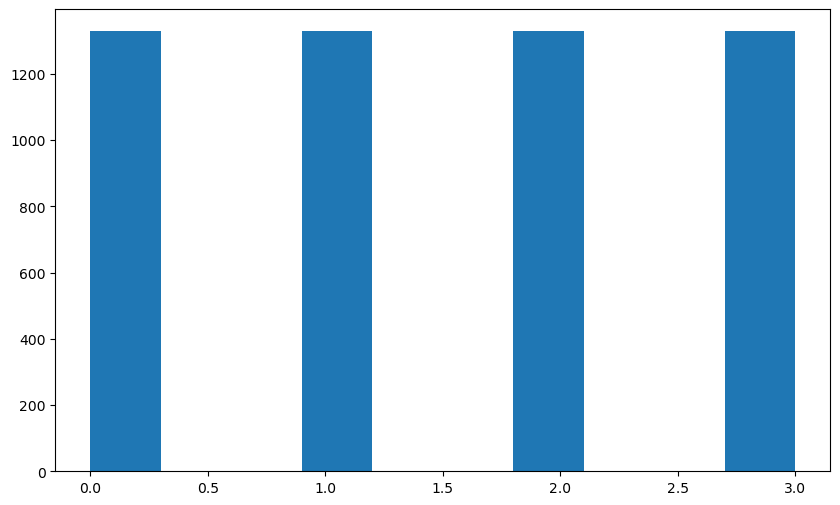

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(y_train)
plt.show()

# 4. Применить алгоритмы классификации: логистическая регрессия, SVM, KNN. Построить матрицу ошибок по результатам работы моделей (использовать confusion_matrix из sklearn.metrics).

### Логистическая регрессия

In [33]:
model_logistic_regression = LogisticRegression(random_state=250)

model_logistic_regression.fit(x_train, y_train)

y_predict_logistic_regression = model_logistic_regression.predict(x_test)

c:\Users\vovaf\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
fig = px.imshow(confusion_matrix(y_test, y_predict_logistic_regression), text_auto=True)
fig.update_layout(xaxis_title = 'Target', yaxis_title = 'Prediction')

### SVM

In [35]:
param_kernel = ('linear', 'rbf', 'poly', 'sigmoid')
parameters = {'kernel': param_kernel}
model_SVC = SVC()
grid_search_svm = GridSearchCV(estimator = model_SVC, param_grid=parameters, cv = 6)

In [36]:
grid_search_svm.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=SVC(),
             param_grid={'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [37]:
best_model_SVC = grid_search_svm.best_estimator_
best_model_SVC.kernel

'linear'

In [38]:
svm_preds = best_model_SVC.predict(x_test)

In [39]:
fig = px.imshow(confusion_matrix(y_test, svm_preds), text_auto=True)
fig.update_layout(xaxis_title = 'Target', yaxis_title = 'Prediction')

### KNN

In [40]:
number_of_neighbors = np.arange(3, 10 ,25) 
model_KNN = KNeighborsClassifier() 
params = {"n_neighbors": number_of_neighbors}

grid_search = GridSearchCV(estimator = model_KNN, param_grid = params, cv = 6)

In [41]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([3])})

In [42]:
grid_search.best_score_

0.9774266365688488

In [43]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [44]:
knn_preds = grid_search.predict(x_test)

In [45]:
fig = px.imshow(confusion_matrix(y_test, knn_preds), text_auto=True)
fig.update_layout(xaxis_title = 'Target', yaxis_title = 'Prediction')

### Сравнить результаты классификации, используя accuracy, precision, recall и f1-меру (можно использовать classification_report из sklearn.metrics). Сделать выводы.

In [46]:
print(classification_report(y_test, y_predict_logistic_regression))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       340
           1       0.75      0.61      0.67       340
           2       0.65      0.66      0.65       340
           3       0.73      0.84      0.78       340

    accuracy                           0.74      1360
   macro avg       0.74      0.74      0.74      1360
weighted avg       0.74      0.74      0.74      1360



In [47]:
print(classification_report(y_test, svm_preds))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       340
           1       0.87      0.90      0.89       340
           2       0.97      0.95      0.96       340
           3       0.98      1.00      0.99       340

    accuracy                           0.94      1360
   macro avg       0.94      0.94      0.94      1360
weighted avg       0.94      0.94      0.94      1360



In [48]:
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       340
           1       0.93      0.90      0.92       340
           2       0.94      0.96      0.95       340
           3       0.98      0.96      0.97       340

    accuracy                           0.95      1360
   macro avg       0.95      0.95      0.95      1360
weighted avg       0.95      0.95      0.95      1360

